In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/student_data.csv")

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Now let's understand those columns

school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# data distributions

In [ ]:
col_counts = dict(df.count(axis=0))
col_types = {c: d for c, d in dict(df.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"quantative: {cols_numerical}")
print(f"descriptive: {cols_string}")

quantative: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
descriptive: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


In [ ]:
# Aesthetic configuration for seaborn and matplotlib
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid', palette='rocket')

# String Data Distributions

# numerical data distributions

In [ ]:
absences_array = df["absences"].values
absences_array

array([ 6,  4, 10,  2,  4, 10,  0,  6,  0,  0,  0,  4,  2,  2,  0,  4,  6,
        4, 16,  4,  0,  0,  2,  0,  2, 14,  2,  4,  4, 16,  0,  0,  0,  0,
        0,  0,  2,  7,  2,  8, 25,  8,  2,  0, 14,  8, 12,  4,  2,  2,  2,
        2,  6,  0,  6,  8,  0,  4,  2,  2,  6,  6,  4,  2,  0,  2,  4,  4,
        2, 12,  0,  0,  2,  2, 54,  6,  8,  0,  2, 12,  2,  4, 10,  4,  2,
        6,  4,  4, 12, 18,  0,  4,  4,  0,  6,  2,  2,  2,  6,  0, 14,  0,
        4, 26,  0, 10,  8,  2,  6,  4,  6,  0,  6, 10,  8,  2,  2,  0, 20,
        6,  2,  6,  2, 18,  0,  0,  0,  2,  0,  8,  0,  0, 12, 16,  0,  0,
        0,  0,  0,  0,  0,  8,  2,  2,  0,  0,  0,  2,  0,  0,  0,  6,  8,
        0,  0,  2,  8,  6,  2,  4,  0,  6,  0,  2,  0, 16,  4,  0,  0,  0,
        0,  2,  0,  0,  4,  4,  2,  4, 10,  4, 10,  2,  0, 56, 14, 12,  2,
        0,  6,  4, 10,  0, 12,  8,  0,  0,  4,  8, 24,  0,  2,  6,  4, 18,
        6, 28,  5, 10,  6,  6, 10, 13,  0, 15, 12,  2, 22, 13,  3,  4,  2,
        0,  2,  0,  0, 16

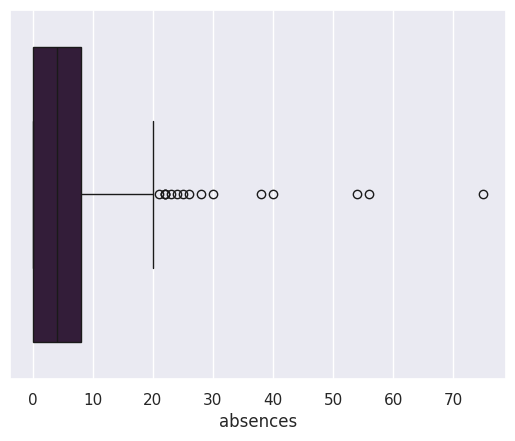

In [ ]:
# Create a boxplot for the "absences" column
ax = sns.boxplot(x=df["absences"])
plt.show()

# Grades

In [ ]:
import numpy as np
from scipy.stats import spearmanr

In [ ]:
df["G1_rank"] = df["G1"].rank()
df["G2_rank"] = df["G2"].rank()
df[["G1", "G2", "G1_rank", "G2_rank"]]

,G1,G2,G1_rank,G2_rank
0,5,6,6.0,36.5
1,5,5,6.0,22.0
2,7,8,52.0,80.5
3,15,14,342.5,317.0
4,6,10,21.5,169.5
...,...,...,...,...
390,9,9,127.0,121.5
391,14,16,315.5,369.0
392,10,8,168.0,80.5
393,11,12,213.0,248.0


In [ ]:
df["d"] = df["G1_rank"] - df["G2_rank"]
df["d2"] = df["d"].apply(lambda x: x*x)
df[["G1", "G2", "G1_rank", "G2_rank","d","d2"]]

,G1,G2,G1_rank,G2_rank,d,d2
0,5,6,6.0,36.5,-30.5,930.25
1,5,5,6.0,22.0,-16.0,256.00
2,7,8,52.0,80.5,-28.5,812.25
3,15,14,342.5,317.0,25.5,650.25
4,6,10,21.5,169.5,-148.0,21904.00
...,...,...,...,...,...,...
390,9,9,127.0,121.5,5.5,30.25
391,14,16,315.5,369.0,-53.5,2862.25
392,10,8,168.0,80.5,87.5,7656.25
393,11,12,213.0,248.0,-35.0,1225.00


In [ ]:
def spearman_rank(df):
    sum_d2 = sum(df["d2"])
    n = len(df["d2"])
    r = 1 - sum_d2*6/((n*n-1)*n)
    return r

r = spearman_rank(df)
print(f"Spearman's Rank Correlation Coefficient is: {r}")

Spearman's Rank Correlation Coefficient is: 0.8956253078883677


<Axes: xlabel='G1', ylabel='G2'>

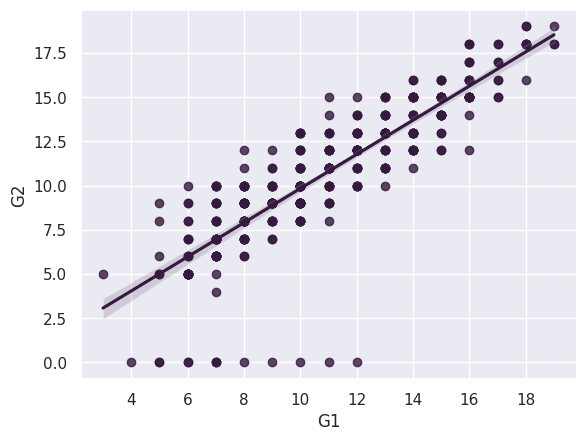

In [ ]:
sns.regplot(x="G1", y="G2", data=df)

<Axes: xlabel='G2', ylabel='G3'>

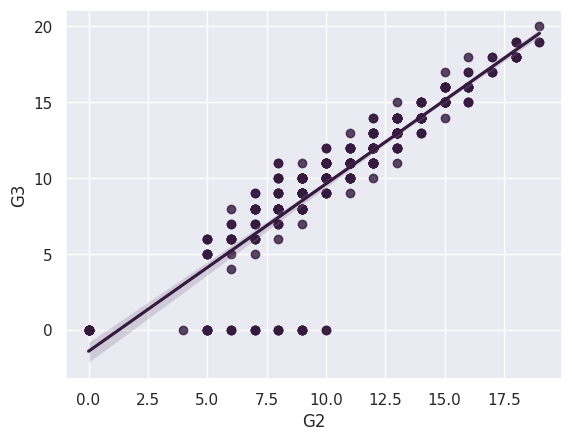

In [ ]:
sns.regplot(x="G2", y="G3", data=df)

<Axes: xlabel='G1', ylabel='G3'>

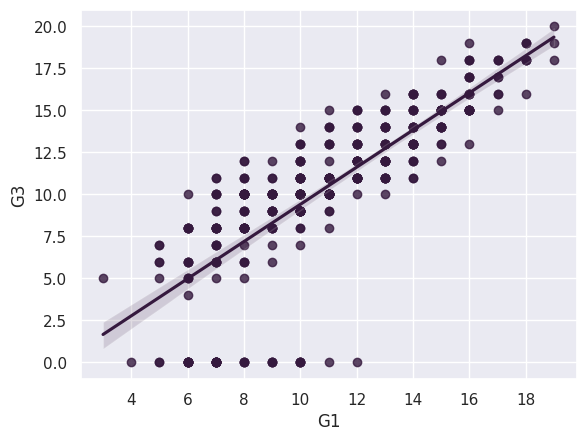

In [ ]:
sns.regplot(x="G1", y="G3", data=df)

# Absences vs. Grade

In [ ]:
x = df["absences"]
y = df["G3"]

# Spearman correlation
spearman_corr, _ = spearmanr(x, y)
print("Spearman Correlation:", spearman_corr)

Spearman Correlation: 0.017730669122425113


[Text(0.5, 1.0, 'Absences vs G3')]

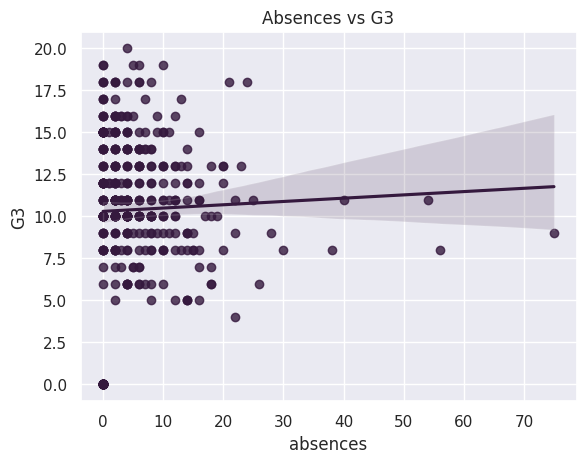

In [ ]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

# study time vs. Grade

In [ ]:
x = df["studytime"]
y = df["G3"]

# Spearman correlation
spearman_corr, _ = spearmanr(x, y)
print("Spearman Correlation:", spearman_corr)

Spearman Correlation: 0.10516968678133246


<Axes: xlabel='studytime', ylabel='G3'>

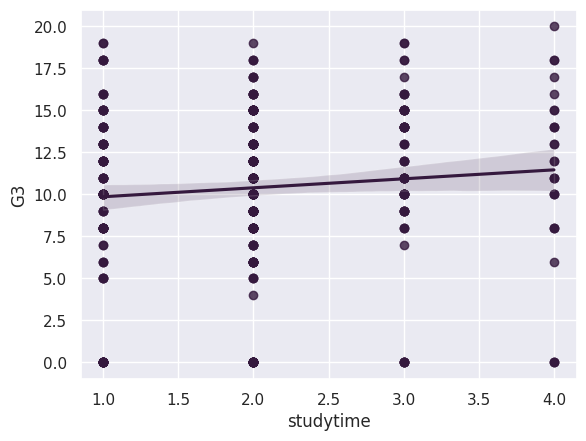

In [ ]:
sns.regplot(x='studytime', y='G3', data=df)

# traveltime vs. Grade

In [ ]:
x = df["traveltime"]
y = df["G3"]

# Spearman correlation
spearman_corr, _ = spearmanr(x, y)
print("Spearman Correlation:", spearman_corr)

Spearman Correlation: -0.12053038660352437


<Axes: xlabel='traveltime', ylabel='G3'>

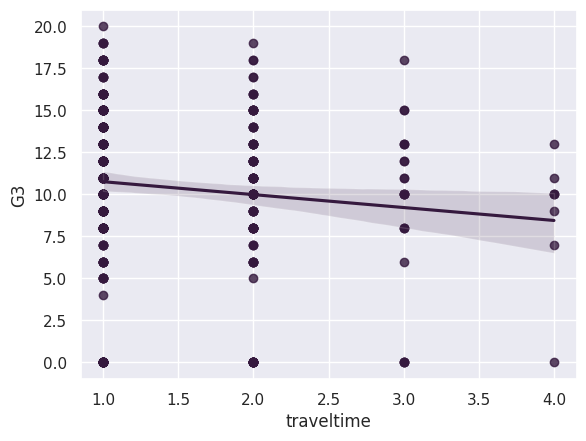

In [ ]:
sns.regplot(x='traveltime', y='G3', data=df)

Another batch of expected results. Students who study more score better on tests and quizzes. In contrast, students who travel more perform worse on tests and quizzes.

### Conclusion
* This section confirmed the obvious: students who study more receive better grades whereas students who travel more or study less receive lower grades.

In [ ]:
new_df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet',
 'romantic'])

In [ ]:
X = new_df.drop('G3', axis=1).values
y = new_df['G3'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 62), (276,), (119, 62), (119,))

In [ ]:
# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Modling

In [ ]:
from sklearn.linear_model import LinearRegression
# initializing the algorithm
model = LinearRegression()

# Fitting Simple Linear Regression to the Training set
model.fit(X_train,y_train)

LinearRegression()

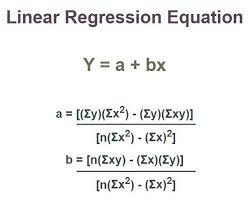

In [ ]:
model.intercept_

10.444062678818181

In [ ]:
model.coef_[:5]

array([-0.06269875,  0.02675509, -0.17221425,  0.10637956, -0.03115917])

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
# Print the equation of the regression line
print(f"The equation of the regression line is: Y = {intercept:.2f} + {slope:.2f}X")

The equation of the regression line is: Y = 10.44 + -0.06X


In [ ]:
X_train.shape , y_train.shape

((276, 62), (276,))

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([ 6.03210483, 11.59184082,  2.79887207,  8.59184082,  8.71960483])

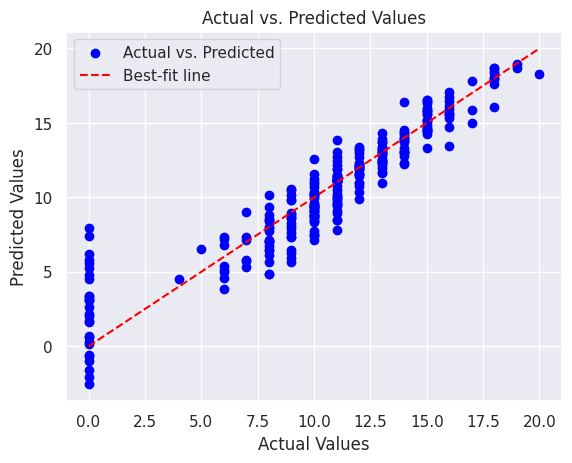

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model.predict(X_train) returns the predicted target values
predicted_values = model.predict(X_train)

# Scatter plot of the actual target values and the predicted values
plt.scatter(y_train, predicted_values, color='blue', label='Actual vs. Predicted')

# Adding the best-fit line (diagonal line representing perfect prediction)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Best-fit line')

# Adding labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


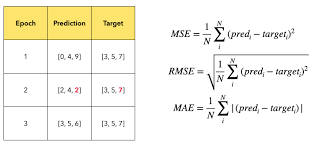

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test,y_pred)

1.5529339000929332

In [108]:
mean_squared_error(y_test,y_pred)

4.999878704389067